# Abrir numpy

In [54]:
%matplotlib inline
import numpy as np

In [55]:
sentences = ['Juan come sushi','Pedro come unos tacos','Juan prepara tacos','Pedro prepara sushi']

In [56]:
from collections import defaultdict

def vocab():
    dicc = defaultdict()
    dicc.default_factory = lambda: len(dicc)
    return dicc

def BoW(corpus,vocab):
    for w in corpus:
        yield[vocab[w_i] for w_i in w.split()]
        
words = vocab()
BagOfWords = list(BoW(sentences,words))

In [57]:
print BagOfWords

[[0, 1, 2], [3, 1, 4, 5], [0, 6, 5], [3, 6, 2]]


In [58]:
print words["Juan"]


0


In [59]:
print words["Pedro"]

3


In [60]:
A = np.zeros((len(words),len(words)))
print A.shape

(7, 7)


# Modelo distribucional simple

In [61]:
for w1 in words:
    for w2 in words:
        cooc = 0
        for context in BagOfWords:
            if words[w1] in context and words[w2] in context and w1 != w2:
                cooc += 1
        A[words[w1],words[w2]] = cooc
    
print A

[[ 0.  1.  1.  0.  0.  1.  1.]
 [ 1.  0.  1.  1.  1.  1.  0.]
 [ 1.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  1.  1.  1.]
 [ 0.  1.  0.  1.  0.  1.  0.]
 [ 1.  1.  0.  1.  1.  0.  1.]
 [ 1.  0.  1.  1.  0.  1.  0.]]


In [62]:
print A[words["Juan"]]

[ 0.  1.  1.  0.  0.  1.  1.]


Ahora, para realizar la reducción en valores singulares, primero usaremos la descomposición en tres matrices distintas. La matriz S que es la diagonal formada por las raíces cuadradas de los valores propios de A. Q y D que son matrices formadas por los vectores propios de AA^t y A^tA, respectivamente. 

In [63]:
Q,S,D = np.linalg.svd(A)
print S

[  4.37228132e+00   2.00000000e+00   2.00000000e+00   1.37228132e+00
   1.00000000e+00   3.65060341e-16   1.06209955e-16]


In [64]:
k = 2
Q = Q[:,:k]
S = np.diag(S)[:k,:k]
print S

[[ 4.37228132  0.        ]
 [ 0.          2.        ]]


In [65]:
B = np.zeros((len(words),k))
for i,w in enumerate(A):
    B[i] = np.dot(np.linalg.inv(S),np.dot(Q.T,w))
    
print B

[[ -3.56163933e-01  -5.77350269e-01]
 [ -4.22460523e-01   2.88675135e-01]
 [ -3.56163933e-01   2.88675135e-01]
 [ -4.22460523e-01  -5.77350269e-01]
 [ -2.89867343e-01   1.66533454e-16]
 [ -4.22460523e-01   2.88675135e-01]
 [ -3.56163933e-01   2.88675135e-01]]


In [66]:
print B[words["Juan"]]

[-0.35616393 -0.57735027]


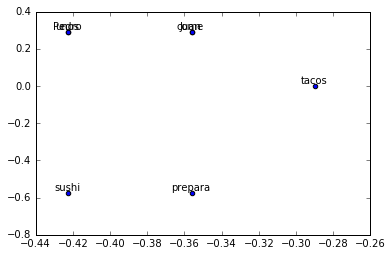

In [67]:
def plot_words(Z,ids):
    import matplotlib.pyplot as plt
    r=0
    plt.scatter(Z[:,0],Z[:,1], marker='o', c='blue')
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        plt.annotate(label.decode('utf8'), xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1
    plt.show()

plot_words(B,words.keys())

In [68]:
def cos(x,y):
    return np.dot(x,y)/( np.linalg.norm(x)*np.linalg.norm(y) )

print cos(A[words["Juan"]],A[words["Pedro"]])

0.894427191


In [69]:
print cos(A[words["Pedro"]],A[words["sushi"]])

0.4472135955


In [70]:
print cos(B[words["Juan"]],B[words["Pedro"]])

0.996884921124


In [71]:
print cos(B[words["Pedro"]],B[words["sushi"]])

-0.0493968811293
